In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### 1. Importing the data

In [2]:
df = pd.read_csv('train_NIR5Yl1.csv')

In [3]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
df2 = pd.read_csv('test_8i3B3FC.csv')

In [5]:
df2.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


### 2. Info on the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141448 entries, 0 to 141447
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          141448 non-null  int64  
 1   Tag         141448 non-null  object 
 2   Reputation  141448 non-null  float64
 3   Answers     141448 non-null  float64
 4   Username    141448 non-null  int64  
 5   Views       141448 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.5+ MB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,330045.0,235748.682789,136039.418471,1.0,117909.0,235699.0,353620.0,471493.0
Reputation,330045.0,7773.146798,27061.412587,0.0,282.0,1236.0,5118.0,1042428.0
Answers,330045.0,3.917672,3.579515,0.0,2.0,3.0,5.0,76.0
Username,330045.0,81442.888803,49215.100730,0.0,39808.0,79010.0,122559.0,175738.0
Views,330045.0,29645.071342,80956.456478,9.0,2594.0,8954.0,26870.0,5231058.0
Upvotes,330045.0,337.505358,3592.441135,0.0,8.0,28.0,107.0,615278.0


In [9]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,141448.0,235743.073497,136269.867118,7.0,117797.00,235830.0,353616.00,471488.0
Reputation,141448.0,7920.927231,27910.724795,0.0,286.00,1245.0,5123.00,1042428.0
Answers,141448.0,3.914873,3.577460,0.0,2.00,3.0,5.00,73.0
Username,141448.0,81348.231117,49046.098215,4.0,40222.75,78795.5,122149.00,175737.0
Views,141448.0,29846.333112,80343.740166,9.0,2608.00,8977.0,26989.25,5004669.0


### 3. Checking null values

In [10]:
df.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [11]:
df2.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [12]:
# df.head()

### 4. Analysis and Preprocessing

### 4.1 Checking correlations between the variables

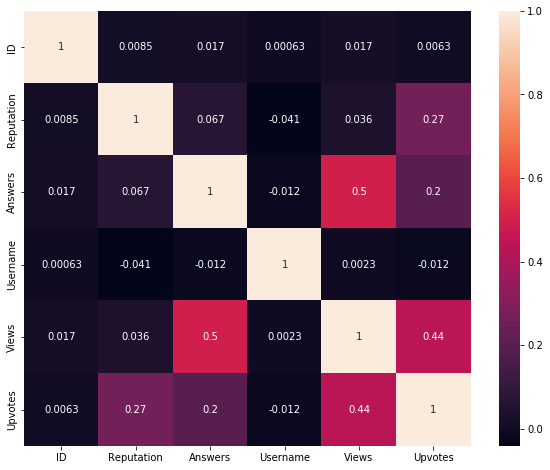

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Answers and views are correlated 50%

In [14]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


### 4.2 Checking for outliers

ID 

count    330045.000000
mean     235748.682789
std      136039.418471
min           1.000000
25%      117909.000000
50%      235699.000000
75%      353620.000000
max      471493.000000
Name: ID, dtype: float64


----------------------------------------------------------------------------------------------------


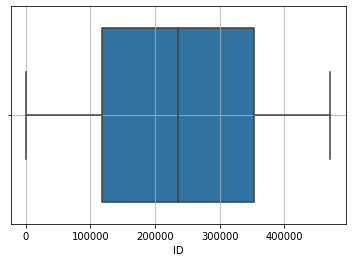

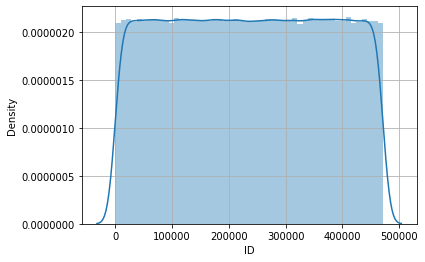

---------------------------------------------------------------------------------------------------- 

Reputation 

count    3.300450e+05
mean     7.773147e+03
std      2.706141e+04
min      0.000000e+00
25%      2.820000e+02
50%      1.236000e+03
75%      5.118000e+03
max      1.042428e+06
Name: Reputation, dtype: float64


----------------------------------------------------------------------------------------------------


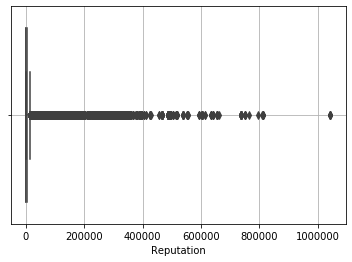

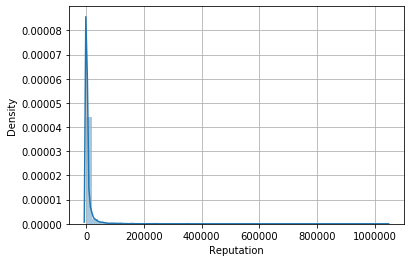

---------------------------------------------------------------------------------------------------- 

Answers 

count    330045.000000
mean          3.917672
std           3.579515
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          76.000000
Name: Answers, dtype: float64


----------------------------------------------------------------------------------------------------


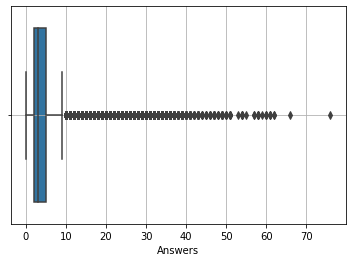

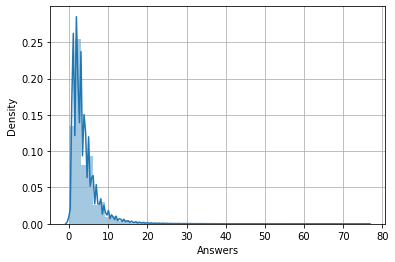

---------------------------------------------------------------------------------------------------- 

Username 

count    330045.000000
mean      81442.888803
std       49215.100730
min           0.000000
25%       39808.000000
50%       79010.000000
75%      122559.000000
max      175738.000000
Name: Username, dtype: float64


----------------------------------------------------------------------------------------------------


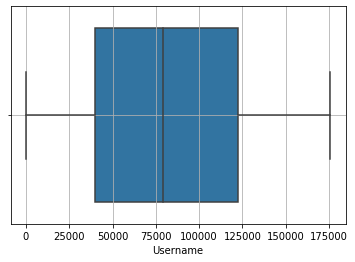

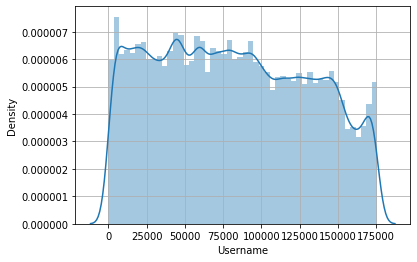

---------------------------------------------------------------------------------------------------- 

Views 

count    3.300450e+05
mean     2.964507e+04
std      8.095646e+04
min      9.000000e+00
25%      2.594000e+03
50%      8.954000e+03
75%      2.687000e+04
max      5.231058e+06
Name: Views, dtype: float64


----------------------------------------------------------------------------------------------------


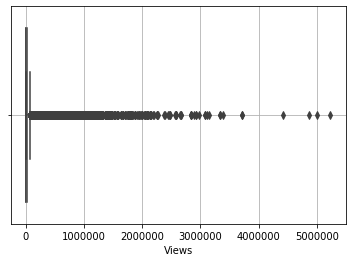

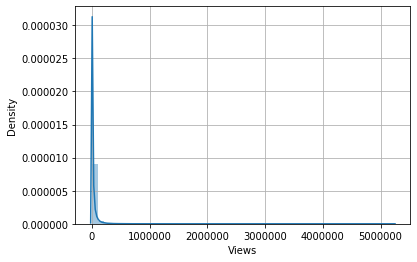

---------------------------------------------------------------------------------------------------- 

Upvotes 

count    330045.000000
mean        337.505358
std        3592.441135
min           0.000000
25%           8.000000
50%          28.000000
75%         107.000000
max      615278.000000
Name: Upvotes, dtype: float64


----------------------------------------------------------------------------------------------------


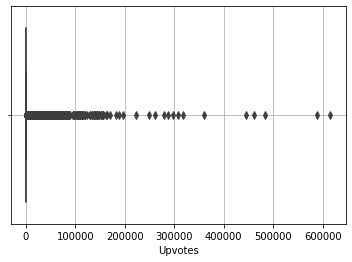

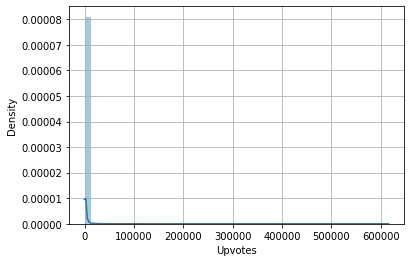

---------------------------------------------------------------------------------------------------- 



In [15]:
# print(df.columns,'\n\n')
# print(df.dtypes,'\n')
for i in df.columns:
    if df[i].dtype != 'object':
        
        print(i,'\n')
        print(df[i].describe())
        print('\n')
        print('--'*50)    
        
        sns.boxplot(df[i])
        plt.grid()
        plt.show()
        
        sns.distplot(df[i])
        plt.grid()
        plt.show()
        
        print('--'*50,'\n')

### We can see that most of the numerical variables have outliers

### 4.3 Average upvotes per tag

In [16]:
tag_upv = pd.DataFrame(df.Upvotes.groupby(df.Tag).mean().sort_values(ascending=False))
tag_upv['Tag'] = tag_upv.index
tag_upv.index = np.arange(0,len(tag_upv))
tag_upv.head()

,Upvotes,Tag
0,540.364686,j
1,407.351971,p
2,384.719704,h
3,327.569916,c
4,316.460136,a


### Most users have upvoted on questions belonging to J tag

### 4.4 Average number of answers per tag

In [17]:
ans_upv = pd.DataFrame(df.Answers.groupby(df.Tag).mean().sort_values(ascending=False))
ans_upv['Tag'] = ans_upv.index
ans_upv.index = np.arange(0,len(ans_upv))
ans_upv.head()

,Answers,Tag
0,4.347256,j
1,4.259189,a
2,4.047697,c
3,3.977077,p
4,3.778837,h


### We can see that most users have answered more for queries in "Tag J"

### 4.5 Reputation of the user vs upvotes / answers

In [18]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

### Data preprocessing

In [20]:
ml = df.copy()

In [21]:
ml.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [22]:
ml.drop(['ID','Username'],axis=1,inplace=True)

In [23]:
# print(ml.Tag.value_counts())
# print(ml.Tag.unique())
# print(ml.Tag.nunique())

### Preprocessing data

In [24]:
tag_list = ml.Tag.unique() ##unique values
tag_id = np.arange(1,len(tag_list)+1)

In [25]:
ml['Tag'].replace(to_replace=tag_list, value=tag_id, inplace=True)

In [26]:
ml.head()

,Tag,Reputation,Answers,Views,Upvotes
0,1,3942.0,2.0,7855.0,42.0
1,1,26046.0,12.0,55801.0,1175.0
2,2,1358.0,4.0,8067.0,60.0
3,1,264.0,3.0,27064.0,9.0
4,2,4271.0,4.0,13986.0,83.0


### Models

In [27]:
lr = LinearRegression()
kn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()
cat = CatBoostRegressor(verbose=False)
lgb = LGBMRegressor()

In [28]:
x = ml.drop('Upvotes',1)
y = ml.Upvotes

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.15, random_state=44)

In [30]:
## train scores
lr.fit(xtrain,ytrain)
lr_train_pred = lr.predict(xtrain)
lr_train_r2 = r2_score(ytrain,lr_train_pred)
lr_train_rmse = np.sqrt(mean_squared_error(ytrain,lr_train_pred))
lr_train_mae = mean_absolute_error(ytrain,lr_train_pred)
print("train_r2   : ",lr_train_r2)
print("train rmse : ",lr_train_rmse)
print('train mae  : ',lr_train_mae)
## test scores
lr.fit(xtrain,ytrain)
lr_test_pred = lr.predict(xtest)
lr_test_r2 = r2_score(ytest,lr_test_pred)
lr_test_rmse = np.sqrt(mean_squared_error(ytest,lr_test_pred))
lr_test_mae = mean_absolute_error(ytest,lr_test_pred)
print("test_r2   : ",lr_test_r2)
print("test rmse : ",lr_test_rmse)
print('test mae  : ',lr_test_mae)

train_r2   :  0.24453792272600594
train rmse :  3240.482899466775
train mae  :  603.1232470319517
test_r2   :  0.3727290566044834
test rmse :  2135.7460930855545
test mae  :  579.3448537996877


In [31]:
%%time
## train scores
kn.fit(xtrain,ytrain)
kn_train_pred = kn.predict(xtrain)
kn_train_r2 = r2_score(ytrain,kn_train_pred)
kn_train_rmse = np.sqrt(mean_squared_error(ytrain,kn_train_pred))
kn_train_mae = mean_absolute_error(ytrain,kn_train_pred)
print("train_r2   : ",kn_train_r2)
print("train rmse : ",kn_train_rmse)
print('train mae  : ',kn_train_mae)
## test scores
kn.fit(xtrain,ytrain)
kn_test_pred = kn.predict(xtest)
kn_test_r2 = r2_score(ytest,kn_test_pred)
kn_test_rmse = np.sqrt(mean_squared_error(ytest,kn_test_pred))
kn_test_mae = mean_absolute_error(ytest,kn_test_pred)
print("test_r2   : ",kn_test_r2)
print("test rmse : ",kn_test_rmse)
print('test mae  : ',kn_test_mae)

train_r2   :  0.8123328479586379
train rmse :  1615.0929871526785
train mae  :  101.36371400665863
test_r2   :  0.8394089853972319
test rmse :  1080.6440244083367
test mae  :  113.63447593269636
Wall time: 5.77 s


In [32]:
%%time
## train scores
rf.fit(xtrain,ytrain)
rf_train_pred = rf.predict(xtrain)
rf_train_r2 = r2_score(ytrain,rf_train_pred)
rf_train_rmse = np.sqrt(mean_squared_error(ytrain,rf_train_pred))
rf_train_mae = mean_absolute_error(ytrain,rf_train_pred)
print("train_r2   : ",rf_train_r2)
print("train rmse : ",rf_train_rmse)
print('train mae  : ',rf_train_mae)
## test scores
rf.fit(xtrain,ytrain)
rf_test_pred = rf.predict(xtest)
rf_test_r2 = r2_score(ytest,rf_test_pred)
rf_test_rmse = np.sqrt(mean_squared_error(ytest,rf_test_pred))
rf_test_mae = mean_absolute_error(ytest,rf_test_pred)
print("test_r2   : ",rf_test_r2)
print("test rmse : ",rf_test_rmse)
print('test mae  : ',rf_test_mae)

train_r2   :  0.9833029341966093
train rmse :  481.75194760687475
train mae  :  41.09010350724068
test_r2   :  0.8704777726407449
test rmse :  970.4969781513007
test mae  :  107.63327661937178
Wall time: 9min 31s


In [33]:
%%time
## train scores
dt.fit(xtrain,ytrain)
dt_train_pred = dt.predict(xtrain)
dt_train_r2 = r2_score(ytrain,dt_train_pred)
dt_train_rmse = np.sqrt(mean_squared_error(ytrain,dt_train_pred))
dt_train_mae = mean_absolute_error(ytrain,dt_train_pred)
print("train_r2   : ",dt_train_r2)
print("train rmse : ",dt_train_rmse)
print('train mae  : ',dt_train_mae)
## test scores
dt.fit(xtrain,ytrain)
dt_test_pred = dt.predict(xtest)
dt_test_r2 = r2_score(ytest,dt_test_pred)
dt_test_rmse = np.sqrt(mean_squared_error(ytest,dt_test_pred))
dt_test_mae = mean_absolute_error(ytest,dt_test_pred)
print("test_r2   : ",dt_test_r2)
print("test rmse : ",dt_test_rmse)
print('test mae  : ',dt_test_mae)

train_r2   :  0.9999999978840369
train rmse :  0.17149736249747347
train mae  :  0.0019961645124724637
test_r2   :  0.8111631646417922
test rmse :  1171.8321045633948
test mae  :  138.77092128385885
Wall time: 8.66 s


In [34]:
%%time
## train scores
gb.fit(xtrain,ytrain)
gb_train_pred = gb.predict(xtrain)
gb_train_r2 = r2_score(ytrain,gb_train_pred)
gb_train_rmse = np.sqrt(mean_squared_error(ytrain,gb_train_pred))
gb_train_mae = mean_absolute_error(ytrain,gb_train_pred)
print("train_r2   : ",gb_train_r2)
print("train rmse : ",gb_train_rmse)
print('train mae  : ',gb_train_mae)
## test scores
gb.fit(xtrain,ytrain)
gb_test_pred = gb.predict(xtest)
gb_test_r2 = r2_score(ytest,gb_test_pred)
gb_test_rmse = np.sqrt(mean_squared_error(ytest,gb_test_pred))
gb_test_mae = mean_absolute_error(ytest,gb_test_pred)
print("test_r2   : ",gb_test_r2)
print("test rmse : ",gb_test_rmse)
print('test mae  : ',gb_test_mae)

train_r2   :  0.9599347327555328
train rmse :  746.2552881699311
train mae  :  143.08386044244088
test_r2   :  0.913895596431585
test rmse :  791.2882497808857
test mae  :  144.70339892704038
Wall time: 1min 45s


In [35]:
%%time
## train scores
xgb.fit(xtrain,ytrain)
xgb_train_pred = xgb.predict(xtrain)
xgb_train_r2 = r2_score(ytrain,xgb_train_pred)
xgb_train_rmse = np.sqrt(mean_squared_error(ytrain,xgb_train_pred))
xgb_train_mae = mean_absolute_error(ytrain,xgb_train_pred)
print("train_r2   : ",xgb_train_r2)
print("train rmse : ",xgb_train_rmse)
print('train mae  : ',xgb_train_mae)
## test scores
xgb.fit(xtrain,ytrain)
xgb_test_pred = xgb.predict(xtest)
xgb_test_r2 = r2_score(ytest,xgb_test_pred)
xgb_test_rmse = np.sqrt(mean_squared_error(ytest,xgb_test_pred))
xgb_test_mae = mean_absolute_error(ytest,xgb_test_pred)
print("test_r2   : ",xgb_test_r2)
print("test rmse : ",xgb_test_rmse)
print('test mae  : ',xgb_test_mae)

train_r2   :  0.9921836576779947
train rmse :  329.6136476736094
train mae  :  78.3276589806516
test_r2   :  0.8844225337321564
test rmse :  916.7662570585056
test mae  :  104.58125967830091
Wall time: 32.5 s


In [36]:
%%time
## train scores
xgbrf.fit(xtrain,ytrain)
xgbrf_train_pred = xgbrf.predict(xtrain)
xgbrf_train_r2 = r2_score(ytrain,xgbrf_train_pred)
xgbrf_train_rmse = np.sqrt(mean_squared_error(ytrain,xgbrf_train_pred))
xgbrf_train_mae = mean_absolute_error(ytrain,xgbrf_train_pred)
print("train_r2   : ",xgbrf_train_r2)
print("train rmse : ",xgbrf_train_rmse)
print('train mae  : ',xgbrf_train_mae)
## test scores
xgbrf.fit(xtrain,ytrain)
xgbrf_test_pred = xgbrf.predict(xtest)
xgbrf_test_r2 = r2_score(ytest,xgbrf_test_pred)
xgbrf_test_rmse = np.sqrt(mean_squared_error(ytest,xgbrf_test_pred))
xgbrf_test_mae = mean_absolute_error(ytest,xgbrf_test_pred)
print("test_r2   : ",xgbrf_test_r2)
print("test rmse : ",xgbrf_test_rmse)
print('test mae  : ',xgbrf_test_mae)

train_r2   :  0.9576482162892618
train rmse :  767.2541615989176
train mae  :  134.76012523355698
test_r2   :  0.8685824506927246
test rmse :  977.5719179740333
test mae  :  139.1014956422813
Wall time: 36.9 s


In [37]:
%%time
## train scores
cat.fit(xtrain,ytrain)
cat_train_pred = cat.predict(xtrain)
cat_train_r2 = r2_score(ytrain,cat_train_pred)
cat_train_rmse = np.sqrt(mean_squared_error(ytrain,cat_train_pred))
cat_train_mae = mean_absolute_error(ytrain,cat_train_pred)
print("train_r2   : ",cat_train_r2)
print("train rmse : ",cat_train_rmse)
print('train mae  : ',cat_train_mae)
## test scores
cat.fit(xtrain,ytrain)
cat_test_pred = cat.predict(xtest)
cat_test_r2 = r2_score(ytest,cat_test_pred)
cat_test_rmse = np.sqrt(mean_squared_error(ytest,cat_test_pred))
cat_test_mae = mean_absolute_error(ytest,cat_test_pred)
print("test_r2   : ",cat_test_r2)
print("test rmse : ",cat_test_rmse)
print('test mae  : ',cat_test_mae)

train_r2   :  0.9648068250066774
train rmse :  699.4112670203886
train mae  :  99.78420984231248
test_r2   :  0.7102000002921083
test rmse :  1451.6811102362692
test mae  :  121.72460091244133
Wall time: 1min 9s


In [38]:
%%time
## train scores
lgb.fit(xtrain,ytrain)
lgb_train_pred = lgb.predict(xtrain)
lgb_train_r2 = r2_score(ytrain,lgb_train_pred)
lgb_train_rmse = np.sqrt(mean_squared_error(ytrain,lgb_train_pred))
lgb_train_mae = mean_absolute_error(ytrain,lgb_train_pred)
print("train_r2   : ",lgb_train_r2)
print("train rmse : ",lgb_train_rmse)
print('train mae  : ',lgb_train_mae)
## test scores
lgb.fit(xtrain,ytrain)
lgb_test_pred = lgb.predict(xtest)
lgb_test_r2 = r2_score(ytest,lgb_test_pred)
lgb_test_rmse = np.sqrt(mean_squared_error(ytest,lgb_test_pred))
lgb_test_mae = mean_absolute_error(ytest,lgb_test_pred)
print("test_r2   : ",lgb_test_r2)
print("test rmse : ",lgb_test_rmse)
print('test mae  : ',lgb_test_mae)

train_r2   :  0.8248636535405303
train rmse :  1560.2404841384903
train mae  :  121.42636682672125
test_r2   :  0.7110505760107996
test rmse :  1449.5491708658471
test mae  :  124.13699409727377
Wall time: 2.77 s


In [39]:
# evals = pd.DataFrame({'Model':['LR','DT','CAT','LGBM','XGB','GB','XGBRF','KNN'],
#              'Train_R2':[lr_train_r2,dt_train_r2,cat_train_r2,
#                          lgb_train_r2,xgb_train_r2,gb_train_r2,xgbrf_train_r2,kn_train_r2],
#              'Test_R2':[lr_test_r2,dt_test_r2,cat_test_r2,lgb_test_r2,xgb_test_r2,gb_test_r2,xgbrf_test_r2,kn_test_r2],
#              'Train_RMSE':[lr_train_rmse,dt_train_rmse,cat_train_rmse,
#                            lgb_train_rmse,xgb_train_rmse,gb_train_rmse,xgbrf_train_rmse,kn_train_rmse],
#              'Test_RMSE':[lr_test_rmse,dt_test_rmse,cat_test_rmse,
#                           lgb_test_rmse,xgb_test_rmse,gb_test_rmse,xgbrf_test_rmse,kn_test_rmse]})

In [40]:

evals = pd.DataFrame({'Model':['LR','DT','RF','CAT','LGBM','XGB','GB','XGBRF','KNN'],
             'Train_R2':[lr_train_r2,dt_train_r2,rf_train_r2,cat_train_r2,
                         lgb_train_r2,xgb_train_r2,gb_train_r2,xgbrf_train_r2,kn_train_r2],
             'Test_R2':[lr_test_r2,dt_test_r2,rf_test_r2,cat_test_r2,lgb_test_r2,xgb_test_r2,gb_test_r2,xgbrf_test_r2,kn_test_r2],
             'Train_RMSE':[lr_train_rmse,dt_train_rmse,rf_train_rmse,cat_train_rmse,
                           lgb_train_rmse,xgb_train_rmse,gb_train_rmse,xgbrf_train_rmse,kn_train_rmse],
             'Test_RMSE':[lr_test_rmse,dt_test_rmse,rf_test_rmse,cat_test_rmse,
                          lgb_test_rmse,xgb_test_rmse,gb_test_rmse,xgbrf_test_rmse,kn_test_rmse],
             'Train_MAE':[lr_train_mae,dt_train_mae,rf_train_mae,cat_train_mae,
                           lgb_train_mae,xgb_train_mae,gb_train_mae,xgbrf_train_mae,kn_train_mae],
             'Test_MAE':[lr_test_mae,dt_test_mae,rf_test_mae,cat_test_mae,
                          lgb_test_mae,xgb_test_mae,gb_test_mae,xgbrf_test_mae,kn_test_mae]
                     })
evals.sort_values('Test_R2',ascending=False,inplace=True)

### Test r2 best models

In [41]:
evals

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
6,GB,0.959935,0.913896,746.255288,791.288250,143.083860,144.703399
5,XGB,0.992184,0.884423,329.613648,916.766257,78.327659,104.581260
2,RF,0.983303,0.870478,481.751948,970.496978,41.090104,107.633277
7,XGBRF,0.957648,0.868582,767.254162,977.571918,134.760125,139.101496
8,KNN,0.812333,0.839409,1615.092987,1080.644024,101.363714,113.634476
1,DT,1.000000,0.811163,0.171497,1171.832105,0.001996,138.770921
4,LGBM,0.824864,0.711051,1560.240484,1449.549171,121.426367,124.136994
3,CAT,0.964807,0.710200,699.411267,1451.681110,99.784210,121.724601
0,LR,0.244538,0.372729,3240.482899,2135.746093,603.123247,579.344854


In [42]:
## other metrics
def metrics():
    print(evals.columns)
    eval_met = str(input('enter metrics :'))
    if eval_met.endswith('MAE') or eval_met.endswith('RMSE'):
        print('\n\n',evals.sort_values(eval_met,ascending=True))
    else:
        print('\n\n',evals.sort_values(eval_met,ascending=False))
        
metrics()

Index(['Model', 'Train_R2', 'Test_R2', 'Train_RMSE', 'Test_RMSE', 'Train_MAE',
       'Test_MAE'],
      dtype='object')
enter metrics :Test_RMSE


    Model  Train_R2   Test_R2   Train_RMSE    Test_RMSE   Train_MAE    Test_MAE
6     GB  0.959935  0.913896   746.255288   791.288250  143.083860  144.703399
5    XGB  0.992184  0.884423   329.613648   916.766257   78.327659  104.581260
2     RF  0.983303  0.870478   481.751948   970.496978   41.090104  107.633277
7  XGBRF  0.957648  0.868582   767.254162   977.571918  134.760125  139.101496
8    KNN  0.812333  0.839409  1615.092987  1080.644024  101.363714  113.634476
1     DT  1.000000  0.811163     0.171497  1171.832105    0.001996  138.770921
4   LGBM  0.824864  0.711051  1560.240484  1449.549171  121.426367  124.136994
3    CAT  0.964807  0.710200   699.411267  1451.681110   99.784210  121.724601
0     LR  0.244538  0.372729  3240.482899  2135.746093  603.123247  579.344854


### Test data

In [43]:
test = pd.read_csv('test_8i3B3FC.csv')

In [44]:
test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141448 entries, 0 to 141447
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          141448 non-null  int64  
 1   Tag         141448 non-null  object 
 2   Reputation  141448 non-null  float64
 3   Answers     141448 non-null  float64
 4   Username    141448 non-null  int64  
 5   Views       141448 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.5+ MB


In [46]:
ids = test['ID'].tolist()

In [47]:
test.Tag.unique()

array(['a', 'c', 'i', 'x', 's', 'p', 'o', 'j', 'h', 'r'], dtype=object)

In [48]:
tag_list

array(['a', 'c', 'r', 'j', 'p', 's', 'h', 'o', 'i', 'x'], dtype=object)

In [49]:
test['Tag'].replace(to_replace=tag_list, value=tag_id, inplace=True)
## Using tag list and tag id which we created earlier. This is because, the values are interchanged for test data.

In [50]:
test.drop(['ID','Username'],axis=1,inplace=True)

In [51]:
test.head()

,Tag,Reputation,Answers,Views
0,1,5645.0,3.0,33200.0
1,2,24511.0,6.0,2730.0
2,9,927.0,1.0,21167.0
3,9,21.0,6.0,18528.0
4,9,4475.0,10.0,57240.0


### Ensembling the best performing models

In [52]:
%%time
gb.fit(x,y)
xgb.fit(x,y)
xgbrf.fit(x,y)
rf.fit(x,y)
kn.fit(x,y)

Wall time: 6min 59s


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [53]:
%%time
gb_pred = gb.predict(test)
xgb_pred = xgb.predict(test)
xgbrf_pred = xgbrf.predict(test)
kn_pred = kn.predict(test)
rf_pred = rf.predict(test)

Wall time: 15.5 s


In [54]:
# mean_preds = pd.DataFrame({'gb':gb_pred,'xgb':xgb_pred,'xgbrf':xgbrf_pred,'knn':kn_pred ,
#                           'cat':cat_pred,'lgb':lgb_pred})

mean_preds = pd.DataFrame({'gb':gb_pred,'xgb':xgb_pred,'xgbrf':xgbrf_pred,'rf':rf_pred})

In [55]:
mean_preds.head()

,gb,xgb,xgbrf,rf
0,178.762140,214.083221,161.017029,222.50
1,291.065445,127.052208,437.887665,74.01
2,57.006831,34.164318,41.157684,32.30
3,36.092093,24.693613,38.324074,10.75
4,263.325196,291.651215,137.742996,369.55


In [56]:
%%time
mpreds = []
for i in mean_preds.index:
    mpreds.append(mean_preds.iloc[i].mean())    

Wall time: 57.1 s


In [57]:
mean_preds['mpred'] = mpreds

In [58]:
final_preds = pd.DataFrame({'ID':ids,'Upvotes':mean_preds['mpred']})

In [59]:
final_preds.head()

,ID,Upvotes
0,366953,194.090598
1,71864,232.503830
2,141692,41.157208
3,316833,27.464945
4,440445,265.567352


### Rounding decimal places

In [60]:
final_preds['Upvotes'] = final_preds.Upvotes.astype(int)

In [61]:
# final_preds = final_preds.round({'Upvotes':0})

In [62]:
final_preds.head()

,ID,Upvotes
0,366953,194
1,71864,232
2,141692,41
3,316833,27
4,440445,265


### Saving the preds as .csv 

In [63]:
final_preds.to_csv('preds.csv',index=False)